In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

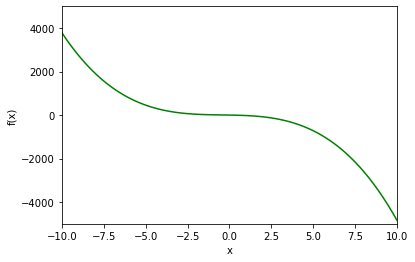

In [2]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

In [3]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

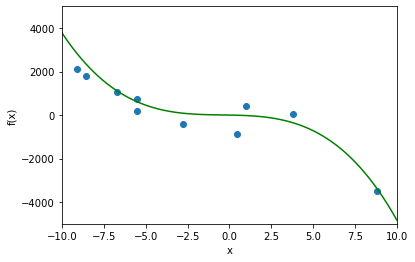

In [4]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

In [5]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [6]:
f_data

array([  745.4884675 ,  -851.08250932,   422.69810766,  2129.66866668,
        -413.07267878,   206.52054624,    44.24369404,  1046.66448866,
        1799.10906399, -3495.863552  ])

In [7]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)
    
class polynomial_regression_sklearn(sklearn_LR):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    generate_features=staticmethod(polynomial_regression.generate_features)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return np.sum((self.predict(x) - y)**2) / y.shape[0]

In [8]:
np.arange(4)

array([0, 1, 2, 3])

In [9]:
polynomial_regression.generate_features(np.arange(4), 3)

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]], dtype=int32)

In [10]:
#Построение полиномиальной регресси при помощи реализации линейной регрессии из Sklearn
mod1=sklearn_LR()
mod1.fit(polynomial_regression.generate_features(x_data, 3), f_data)
mod1.predict(polynomial_regression.generate_features(x_data, 3))

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

In [11]:
#Построение полиномиальной регресси при ощи созданного нами класса
mod2=polynomial_regression_sklearn(3)
mod2.fit(x_data, f_data)
mod2.predict(x_data)

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

In [12]:
our_mod=polynomial_regression(2)
our_mod.fit(x_data, f_data)
sk_mod=polynomial_regression_sklearn(2)
sk_mod.fit(x_data, f_data)
print('Коэффициенты при факторах(наша модель):', our_mod.w)
print('Коэффициенты при факторах(sklearn):', sk_mod.coef_)
print('Нулевые коэффициенты(интерцепты):',our_mod.w0, sk_mod.intercept_)

Коэффициенты при факторах(наша модель): [[-244.1943038    -8.45469064]]
Коэффициенты при факторах(sklearn): [-245.99569456   -5.82400107]
Нулевые коэффициенты(интерцепты): -50.521599022696435 -219.69194405215626


In [13]:
our_mod.predict(x_data)

array([ 1041.950331  ,  -165.46323275,  -306.83531545,  1470.42505857,
         564.06648443,  1042.58317778, -1092.69286742,  1209.36489745,
        1423.59837175, -2862.11146925])

In [14]:
sk_mod.predict(x_data)

array([  963.31967725,  -334.90351389,  -475.12730327,  1534.8970571 ,
         420.32419835,   964.08251447, -1231.1831019 ,  1171.29729954,
        1464.18020411, -2842.51273709])

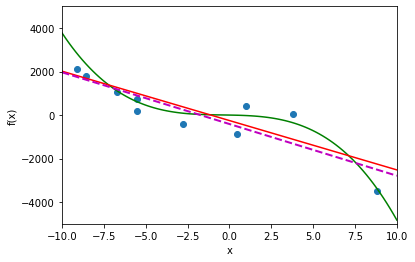

In [15]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(1)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(1)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

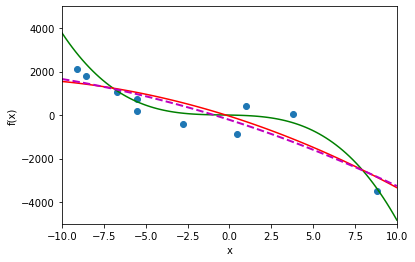

In [16]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(2)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(2)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

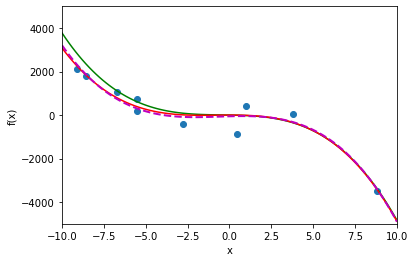

In [17]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(3)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(3)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

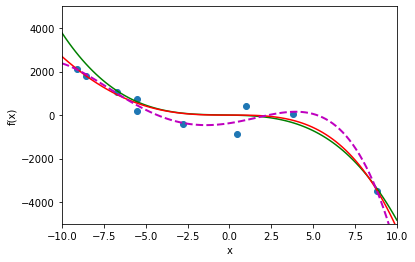

In [18]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(4, 0.01)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(4)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

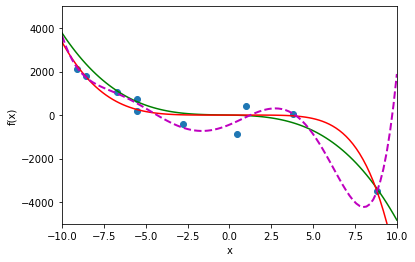

In [19]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(6, 0.0005, max_iter = 1e5)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(6)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

In [20]:
#Значение штрафной функции для нашей модели и для модели Sklearn
model1.test(x_data, f_data), model2.test(x_data, f_data)

(153501.46050728945, 76841.30434762468)

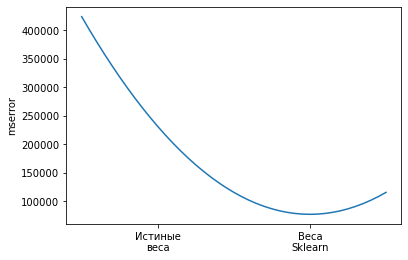

In [21]:
#Истиные коэффициенты используемые для генерации данных
w_true=np.array([[- 13.2,  - 5.3,  - 4.17, 0, 0, 0]])
w0_true=0.6

#Коэффициенты из Sklearn
w_sklearn=model2.coef_[np.newaxis, :]
w0_sklearn=model2.intercept_

x=polynomial_regression.generate_features(x_data, 6)
y=f_data[:, np.newaxis]
n_samples=len(f_data)

x_dots=np.arange(-0.5, 1.55, 0.05)
def _mserror(w, w0):
    diff=x.dot(w.T)+w0-y
    return np.sum(diff**2)/n_samples

mserror_values=np.array([_mserror(w_true+(w_sklearn-w_true)*i, w0_true+(w0_sklearn-w0_true)*i) 
                         for i in x_dots])
#Актуальные данные
plt.ylabel('mserror')
plt.xticks([0, 1], ['Истиные\nвеса', 'Веса\nSklearn'])
plt.plot(x_dots, mserror_values)

### Ремарка: как выполнить оптимизацию при помощи scipy

In [22]:
from scipy.optimize import minimize
class polynomial_regression_lbfgs(polynomial_regression):
    def __init__(self, max_power):
        self.max_power=max_power
    def _optimize(self, X, Y):
        def assign_w(w):
            self.w0=w[0]
            self.w=w[1:][np.newaxis, :]
        def func(w):
            assign_w(w)
            return super(polynomial_regression, self).test(X, Y)
        def jac(w):
            assign_w(w)
            gr_w, gr_w0=self._mserror_grad(X, Y)
            return np.concatenate([[gr_w0], gr_w.flatten()])
        w=np.zeros((X.shape[1]+1,))
        w=minimize(func, w, jac=jac, method='BFGS').x
        assign_w(w)
        

In [23]:
model_bfgs=polynomial_regression_lbfgs(6)
model_bfgs.fit(x_data, f_data)
model_bfgs.test(x_data, f_data)

76841.30434762462

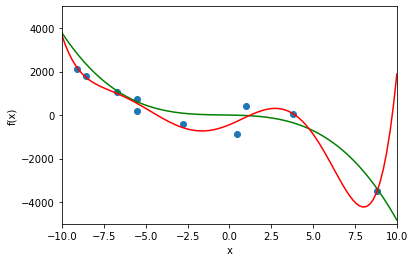

In [24]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
plt.plot(dots, model_bfgs.predict(dots), color='r')

In [68]:
class polynomial_regression_lbfgs_w_l2(polynomial_regression_lbfgs):
    def __init__(self, max_power, c=1):
        self.max_power=max_power
        self.c = c
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0 + self.c * np.sum(self.w**2)
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0] + 2 * self.c * self.w, np.sum(2*delta)/y_real.shape[0]

In [69]:
model_w_l2=polynomial_regression_lbfgs_w_l2(6, 0.25)
model_w_l2.fit(x_data, f_data)
model_w_l2.test(x_data, f_data)

946532.5669765581

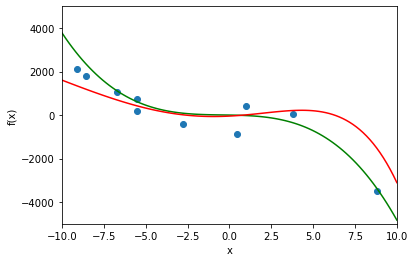

In [70]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
plt.plot(dots, model_w_l2.predict(dots), color='r')

## Кросс-валидация

In [71]:
#Посчитаем р-квадрат
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_square(model_w_l2.predict(x_data), f_data))

0.7267470037694885


In [72]:
indexes=np.arange(len(f_data))%5
y_actual=[]
y_predicted=[]

for i in range(5):
    y_actual.append(f_data[indexes==i])
    mod=polynomial_regression_lbfgs_w_l2(6, 0.25)
    mod.fit(x_data[indexes!=i], f_data[indexes!=i])
    y_predicted.append(mod.predict(x_data[indexes==i]))
    
y_actual=np.concatenate(y_actual)
y_predicted=np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

0.6340067770382183


In [73]:
np.sum((y_actual-np.mean(y_actual))**2)/len(y_actual)

2249573.810796306